## Klaviyo Data Challenge

In [1]:
# importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import shapiro
from sklearn import metrics

## Data

In [2]:
# reading the data

df = pd.read_csv("screening_exercise_orders_v201810.csv")

In [3]:
# displaying the first 5 rows

df.head()

,customer_id,gender,date,value,predicted_gender
0,1000,0,2017-01-01 00:11:31,198.5,1
1,1001,0,2017-01-01 00:29:56,338.0,1
2,1002,1,2017-01-01 01:30:31,733.0,1
3,1003,1,2017-01-01 01:34:22,772.0,1
4,1004,0,2017-01-01 03:11:54,508.0,1


In [4]:
# dataset description

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13471 entries, 0 to 13470
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       13471 non-null  int64  
 1   gender            13471 non-null  int64  
 2   date              13471 non-null  object 
 3   value             13471 non-null  float64
 4   predicted_gender  13471 non-null  int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 526.3+ KB


We notice that there are no null values in the dataset.

## Data Manipulation

We shall convert the date into a datetime object so that it is easier to perform further manipulations

In [5]:
df['date'] = df['date'].astype('datetime64')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13471 entries, 0 to 13470
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customer_id       13471 non-null  int64         
 1   gender            13471 non-null  int64         
 2   date              13471 non-null  datetime64[ns]
 3   value             13471 non-null  float64       
 4   predicted_gender  13471 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3)
memory usage: 526.3 KB


In [7]:
# Creating a day of the week column

df['day_of_week'] = [d.day_name() for d in df['date']]

In [8]:
# Ordering the day of the week column

df['day_of_week'] = pd.Categorical(df['day_of_week'], 
                                 categories= ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday'],
                                              ordered = True)

In [9]:
# Creating the time of the day column

df['time'] = [d.time() for d in df['date']]

In [10]:
# Splitting the the time of the day column into different sessions in a day

df=df.assign(session=pd.cut(df.date.dt.hour,
                            [0,6,12,18,23],
                            labels=['Night','Morning','Afternoon','Evening'],
                            include_lowest=True))

In [11]:
# Creating a week of the year column

df['week_of_year'] = df.date.apply(lambda x: x.weekofyear)

In [12]:
# Creating a day of the year column

df['day_of_year'] = df.date.apply(lambda x: x.dayofyear)

In [13]:
# Manipulating the date column to show just the date and not the timestamp

df['date'] = [d.date() for d in df['date']]

In [14]:
df.head()

,customer_id,gender,date,value,predicted_gender,day_of_week,time,session,week_of_year,day_of_year
0,1000,0,2017-01-01,198.5,1,Sunday,00:11:31,Night,52,1
1,1001,0,2017-01-01,338.0,1,Sunday,00:29:56,Night,52,1
2,1002,1,2017-01-01,733.0,1,Sunday,01:30:31,Night,52,1
3,1003,1,2017-01-01,772.0,1,Sunday,01:34:22,Night,52,1
4,1004,0,2017-01-01,508.0,1,Sunday,03:11:54,Night,52,1


## Exploratory Data Analysis

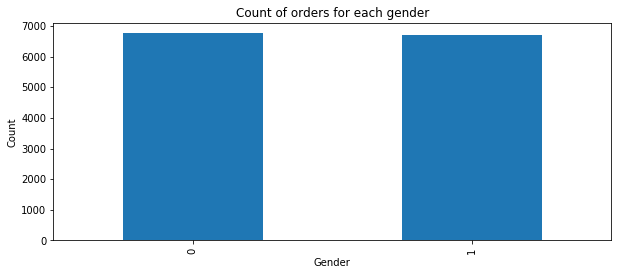

In [15]:
# plotting the count of orders for each gender

ax = df.groupby(['gender']).count()['customer_id'].plot(kind = 'bar', figsize = (10,4), 
                            title = 'Count of orders for each gender')
ax.set_xlabel('Gender')
ax.set_ylabel('Count');

Based on the above chart, we notice that the count of orders are almost similar for both the genders "0" and "1".

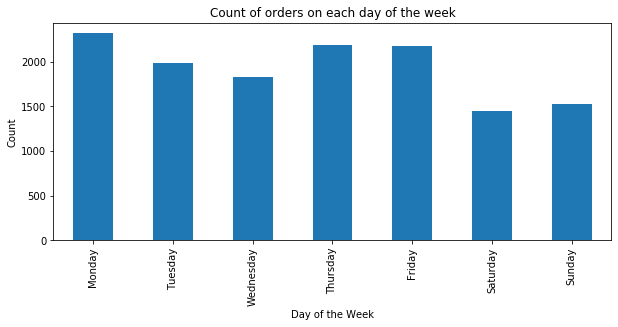

In [16]:
# plotting the count of orders on each day of the week

ax = df.groupby(['day_of_week']).count()['customer_id'].plot(kind = 'bar', figsize = (10,4), 
                            title = 'Count of orders on each day of the week')
ax.set_xlabel('Day of the Week')
ax.set_ylabel('Count');

By looking at the above barchart, the number of orders placed on weekends seems to be lower than the number of orders placed during weekdays. And Mondays, Thursdays and Fridays seems to be busier with respect to orders placed compard to the other days.

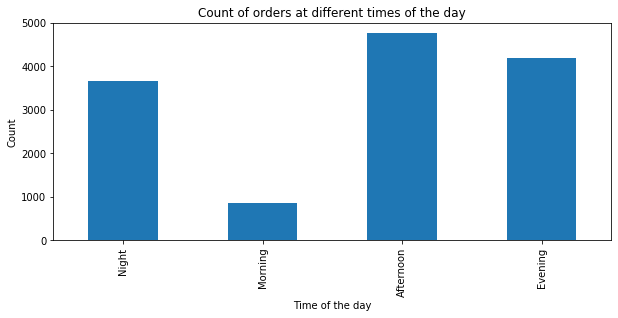

In [17]:
# plotting the count of orders at different times of the day

ax = df.groupby(['session']).count()['customer_id'].plot(kind = 'bar', figsize = (10,4), 
                            title = 'Count of orders at different times of the day')
ax.set_xlabel('Time of the day')
ax.set_ylabel('Count');

From the above bar chart, we see that the most number of orders are placed during afternoons.

## Questions

### A) Assemble a dataframe with one row per customer and the following columns:

customer_id, gender, most_recent_order_date, order_count (number of orders placed by this customer)

In [18]:
df_A = df.groupby(['customer_id', 'gender']).agg(most_recent_order_date = pd.NamedAgg('date','max'), 
                                          order_count = pd.NamedAgg('value','count')).reset_index()

Sort the dataframe by customer_id ascending and display the first 10 rows.

In [19]:
df_A = df_A.sort_values('customer_id', ascending= True)
df_A.head(10)

,customer_id,gender,most_recent_order_date,order_count
0,1000,0,2017-01-01,1
1,1001,0,2017-01-01,1
2,1002,1,2017-02-19,3
3,1003,1,2017-04-26,4
4,1004,0,2017-01-01,1
5,1005,1,2017-12-16,2
6,1006,1,2017-05-09,3
7,1007,0,2017-01-01,1
8,1008,0,2017-12-17,3
9,1009,1,2017-01-01,1


### B) Plot the count of orders per week for the store.

In [20]:
df_B = df.groupby(['week_of_year']).agg(count_of_orders = pd.NamedAgg('value','count')).reset_index()
df_B.head()

,week_of_year,count_of_orders
0,1,180
1,2,264
2,3,405
3,4,233
4,5,211


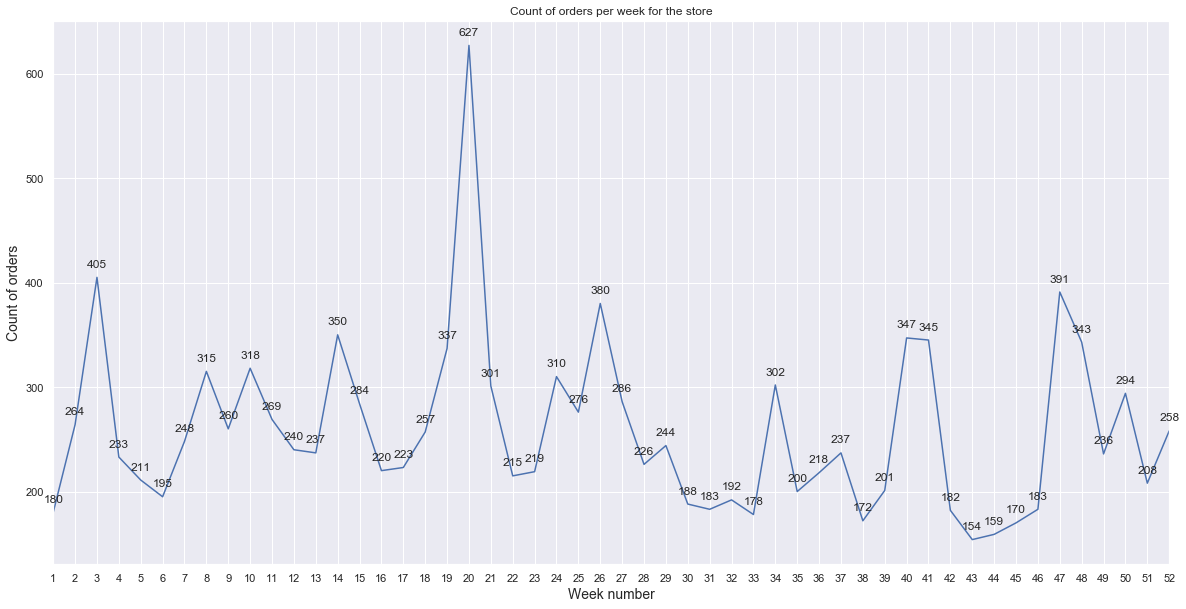

In [21]:
sns.set(rc = {'figure.figsize':(20,10)})
ax = sns.lineplot(x = 'week_of_year', y = 'count_of_orders', data = df_B)
ax.set(xlim = (1,52),
       xticks = range(1,53))
ax.set_title('Count of orders per week for the store')

xs = df_B['week_of_year'].to_numpy()
ys = df_B['count_of_orders'].to_numpy()

for x,y in zip(xs,ys):

    label = y

    ax.annotate(label, # the text to be displayed on the corresponding points
                 (x,y), # the points to label
                 textcoords="offset points", # signifies how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

plt.ylabel('Count of orders',fontsize=14)
plt.xlabel('Week number',fontsize=14);

From the above graph, we can see that the week 20 has the most numbers of orders in the given year.

### C) Compute the mean order value for gender 0 and for gender 1. Do you think the difference is significant? Justify your choice of method.

We are asked to check whether there is a significant difference between the two groups (i.e. two different genders - Male and Female in this case). In order to compare two different groups, we use t-test.<br>
However, before we proceed further, we need to check whether the following assumptions of the t-test hold good with respect to this data.<br>
<b>Assumption of Independence:</b> This assumption is satisfied because we are conducting the t-test between two independent, categorical groups that represent the independent variable (i.e. two different genders - Male and Female in this case).<br>
<b>Assumption of normality:</b> The dependent variable which is the order value must be normally distributed and also be measured on a continuous scale. We shall check for this assumption using Histograms<br>
<b>Assumption of Homogeneity of Variance:</b> The variances of the dependent variable which is the order value should be equal.

<b>Check for the assumption of normality:</b><br>
We shall use histogram to check for the normality assumption.

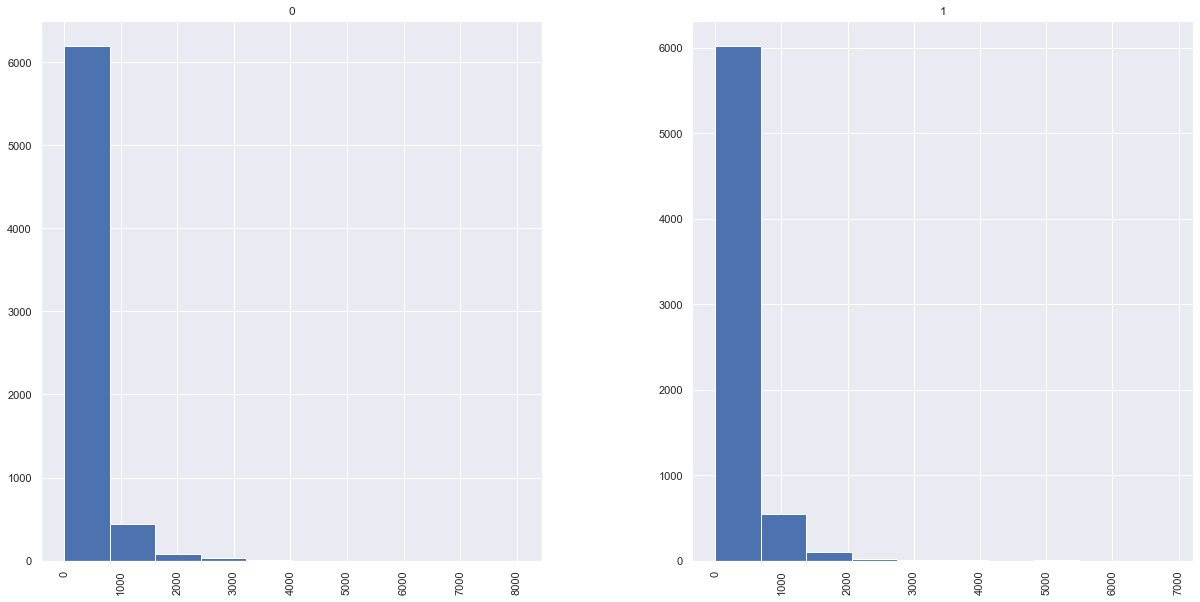

In [22]:
df['value'].hist(by = df['gender']);

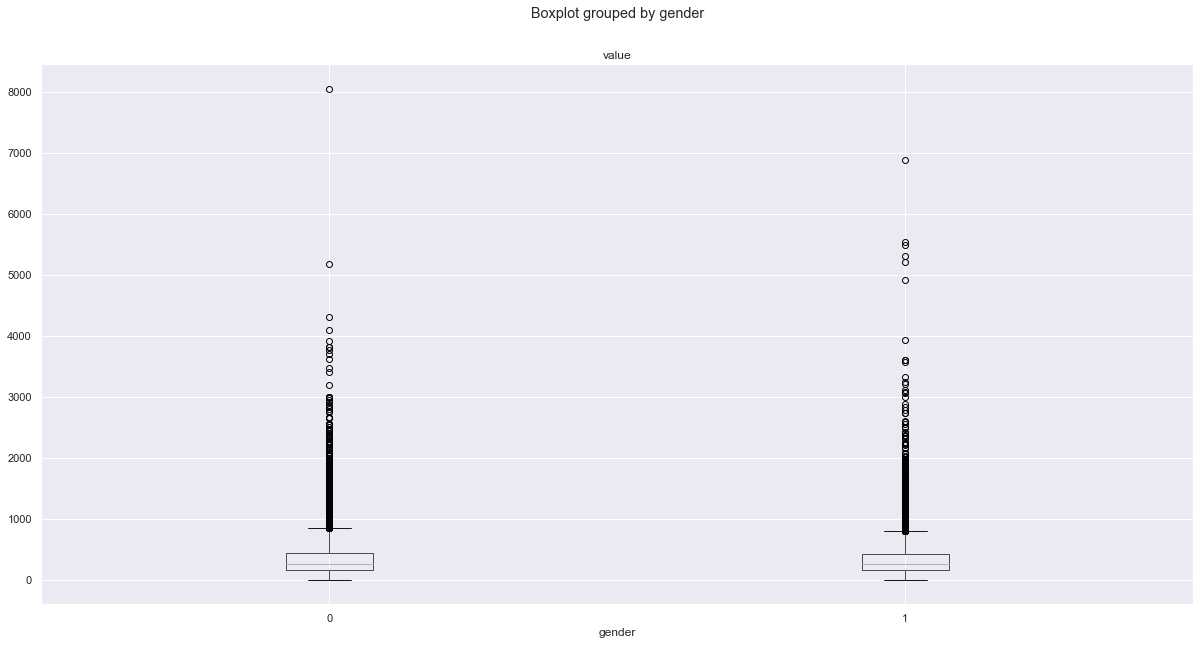

In [23]:
df.boxplot(column=['value'], by='gender');

From the above histograms and boxplots, it can be seen that the data for the dependent variable (i.e. order value) is skewed and not normal (i.e. not bell shaped). Hence, in order to satisfy the normality assumption, we need to do log transformation of the data. But since some of the order values may be $0, we add 1 to the order values in order to avoid NaN values.

In [24]:
df['log_order_value'] = np.log(df['value'] +1)

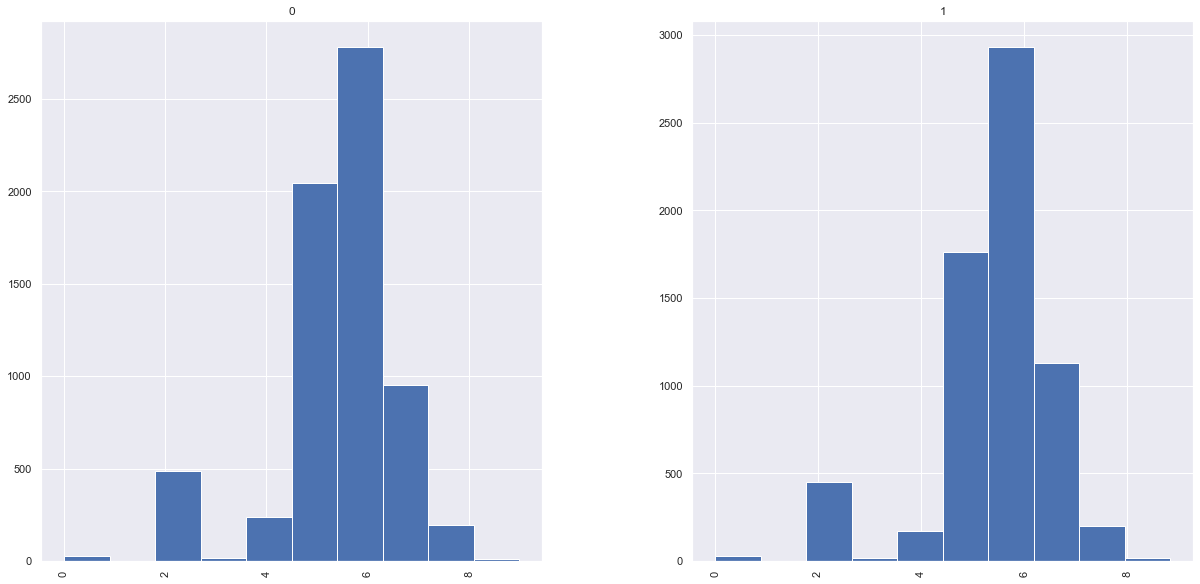

In [25]:
df['log_order_value'].hist(by = df['gender']);

From the above Histograms of the log transformed order values, it can be seen that the data for the dependent variable (i.e. order value) seems to be normally distributed.<br>
However, to further statistically verify whether the log transformed order values follow a Gaussian distribution, we conduct a Shapiro-Wilk test.

In [27]:
log_order_value_0 = df.loc[df['gender'] == 0]['log_order_value'].to_numpy()

stat, p = shapiro(log_order_value_0)
print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('Based on Shapiro-Wilk test, sample looks Gaussian (fail to reject H0)')
else:
    print('Based on Shapiro-Wilk test, sample does not look Gaussian (reject H0)')

Statistics=0.875, p=0.000
Based on Shapiro-Wilk test, sample does not look Gaussian (reject H0)


In [28]:
log_order_value_1 = df.loc[df['gender'] == 1]['log_order_value'].to_numpy()

stat, p = shapiro(log_order_value_1)
print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('Based on Shapiro-Wilk test, sample looks Gaussian (fail to reject H0)')
else:
    print('Based on Shapiro-Wilk test, sample does not look Gaussian (reject H0)')

Statistics=0.872, p=0.000
Based on Shapiro-Wilk test, sample does not look Gaussian (reject H0)


In [29]:
df_C = df.groupby(['gender']).agg(mean = ('log_order_value','mean'), std = ('log_order_value','std'), 
                           variance = ('log_order_value','var'), count= ('log_order_value','count')).reset_index()
df_C

,gender,mean,std,variance,count
0,0,5.422276,1.154447,1.332747,6759
1,1,5.413693,1.116729,1.247084,6712


For a t-test to be valid on a sample of smaller size of 20 or 30, the population distribution would have to be approximately normal.

However, based on the central limit theorem, means of samples from a population with finite variance approach a normal distribution regardless of the population distribution. In general, the sample means are essentially normally distributed as long as the sample size is larger than 30. And, we notice that in our case the variances of the two groups are different as well. Hence, we use Welch t-test. The Welch t-test is an adaptation of Student's t-test and is used to compare the means of two groups of samples when the variances are different.

<b> Welch t-test for two samples</b>

<b> Hypothesis formulation:</b><br>
<b> Null Hypothesis (H0):</b> There is no significant difference between the the mean order value for two genders<br>
<b> Alternate Hypothesis (H1):</b> There is a significant difference between the the mean order value for two genders<br>
<b> alpha value:</b> 0.05

In [30]:
# since we have unequal variance, we set the parameter equal_var to False
p_value_two_tail = stats.ttest_ind(log_order_value_0,log_order_value_1, equal_var = False).pvalue 

p_value_two_tail = round(p_value_two_tail,3)
p_value_two_tail
print("The p-value of the two tailed Welch t-test is {}".format(p_value_two_tail))

The p-value of the two tailed Welch t-test is 0.661


From the p-value we found using the t-test, we can see that the p-value of 0.661 is greater than our pre-determined alpha-level of 0.05, we fail to reject our null-hypothesis and conclude that we do not have a statistically significant evidence that shows that the mean order value of the two genders are different with a confidence interval of 95%.

### D) Generate a confusion matrix for the gender predictions of customers in this dataset. You should assume that there is only one gender prediction for each customer. What does the confusion matrix tell you about the quality of the predictions?

In [31]:

y_act = list(df['gender'])
y_pred = list(df['predicted_gender'])
metrics.confusion_matrix(y_act, y_pred)

array([[3349, 3410],
       [1463, 5249]], dtype=int64)

The confusion matrix above shows that<br>
3349 records labelled "0" are correctly predicted as "0"<br>
5249 records labelled "1" are correctly predicted as "1"<br>
3410 records labelled "0" are incorrectly predicted as "1"<br>
1463 records labelled "1" are incorrectly predicted as "0"<br>

Based on the confusion matrix, we can calculate the classification metrics such as accuracy, precision, and recall.

TP = True Positive <br>
TN = True Negative <br>
FP = False Positive <br>
FN = False Negative <br>

Accuracy = (TP+TN)/(TP+FP+FN+TN)

In [32]:
metrics.accuracy_score(y_act, y_pred)

0.6382599658525722

Based on the accuracy score from the confusion matrix, we can say that the quality of the predictions is 63.82% accurate. But accuracy is a good measure only with respect to a symmetric dataset in which false negatives and false positives counts are close. Also when false negatives and false positives have similar costs. Hence, we cannot just go by the accuracy score to evaluate the quality of predictions.


So now we turn to precision and recall scores.<br>
Precision score signifies how confident are we with respect to our prediction of true positives. i.e. to minimize the Type 1 error, we improve the precision.<br>
Recall score signifies how confident are we with respect to not missing out any positives. i.e. to minimize the Type 2 error, we improve the recall.

Precision = TP/(TP+FP)

Recall = TP/(TP+FN)

In [33]:
print(metrics.classification_report(y_act, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.50      0.58      6759
           1       0.61      0.78      0.68      6712

    accuracy                           0.64     13471
   macro avg       0.65      0.64      0.63     13471
weighted avg       0.65      0.64      0.63     13471



From the above classification report, we can see that <br>
Precision score of 70% for gender "0" signifies that on average, 3 of every 10 "0" labeled records by our classification model  is "1", and 7 records are labelled as "0".<br>
Precision score of 61% for gender "1" signifies that on average, 4 of every 10 "1" labeled records by our classification model is "0", and 6 records are labelled as "1".<br>
Recall score of 50% for gender "0" signifies that approximately 5 of every 10 "0" labeled records are missed by our classification model and 5 are labelled <br> as "0".<br>
Recall score of 78% for gender "1" signifies that approximately 2 of every 10 "1" labeled records are missed by our classification model and 8 are labelled<br> as "1".<br>

In [34]:
precision = metrics.precision_score(y_act, y_pred)
print("The overall precision score of the model is {}".format(round(precision,3)))

The overall precision score of the model is 0.606


In [35]:
recall = metrics.recall_score(y_act, y_pred)
print("The overall recall score of the model is {}".format(round(recall,3)))

The overall recall score of the model is 0.782


The overall precision and recall scores are 60.61% and 78.20% respectively.<br>This shows that the classification model is more prone to make a Type 1 error than a Type 2 error, i.e. it is predicting the gender 1 when the gender is "0" (3410 records) more often than it is predicting gender 0 when the gender is "1" (1463 records).<br>
This also shows that the models has learnt to correctly predict the classification of gender "1" (5249 records) more than it correctly predicts the gender "0"(3349 records).

### E) Describe one of your favorite tools or techniques and give a small example of how it's helped you solve a problem. Limit your answer to one paragraph, and please be specific.

One of the projects that I worked on as a Data Science Intern at the Iowa Department of Transportation was predicting the customer wait-times at the DMV stations. The goal was to display the Live estimated customer wait-times for every hour on the Iowa DOT official website for any working day. The data consisted of millions of records procured from the Qmatic queue management scheduling software for the past 10 years that contained the historic wait-times of customers at 18 major driving license stations across Iowa. My favourite modeling technique that I used to tackle this problem was FB Prophet time-series forecasting tool. The cool thing about this technique is that it is fairly simple and straighforward to implement in the sense that it needs only two columns to predict the output - the timestamp and the value (customer wait-times in this case). Besides, this additive time series modeling technique also handles daily, weekly, monthly or yearly data very well. To adjust for the output fluctuations, I used LOWESS (Locally weighted smoothing) smoothing technique with various smoothing spans which lowered the RMSE of the forecast and improved the prediction accuracy. Instead of the traditional way to deploy an ML model using Flask, I did it using Streamlit. I found Streamlit to be easier for deploying ML solutions since it only requires Python scripting and we require less code is needed to create a beautiful application. This was then integrated into the official Iowa DOT website. 
Power BI is my favorite go-to tool for data analysis and creating interactive visualizations. My exploratory data anlysis and published dashboards for this project which were used to make better decisions are below,
<br> 
http://bit.do/DLanalysis <br>
http://bit.ly/DLquestion <br>
http://bit.ly/DLsmoothing

Thank you for the opportunity!

### Name: Kishor Kumar Sridhar
### Email: kishorkumarsridhar@gmail.com